# Flood  - Merge Features

<h3> 
Aaron Trefler <br/>
JPL <br/>
Created: 06/22/2016 <br/>
</h3>

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.io as sio 

from flood_functions import grace_brick_convert_lowres 
from IPython.display import display, HTML

In [3]:
#%matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# define directories
dir_flood = '../../Raw Data/Flood Observatory/'
dir_python_data = '../Data/'
dir_grace = '../../Work_Matlab/Data/'
dir_figures = '../Figures/'

# Load Data

## Land Mask

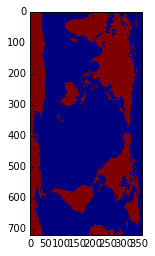

In [56]:
# lowres land mask
f = open(dir_python_data + 'grace_land_mask.p', 'rb')
land_mask = pickle.load(f)
f.close()

land_mask = np.flipud(land_mask.transpose())

#plt.imshow(land_mask)
plt.imshow(np.transpose(np.flipud(land_mask), axes=[1,0]))
plt.show()

## GRACE

In [5]:
# GRACE Matlab files
mat_content_1 = sio.loadmat(dir_grace +'grace_features')

In [6]:
# GRACE MASCON-CRI data description
grace_features = sio.whosmat(dir_grace + 'grace_features')
print('\n'.join('{} {} {}'.format(*element) for element in grace_features))

lwe (720, 360, 152) double
lwe_clim (720, 360, 152) double
lwe_clim_norm (720, 360, 152) double
lwe_clim_rank (720, 360, 152) double
lwe_clim_rank_norm (720, 360, 152) double
lwe_dt (720, 360, 152) double
lwe_dt_norm (720, 360, 152) double
lwe_noClim (720, 360, 152) double
lwe_noClim_norm (720, 360, 152) double
lwe_noClim_rank (720, 360, 152) double
lwe_noClim_rank_norm (720, 360, 152) double
lwe_norm (720, 360, 152) double
lwe_rank (720, 360, 152) double
lwe_rank_norm (720, 360, 152) double


In [7]:
# assign grace maps to python objects

# continuous
grace_lwe = mat_content_1['lwe']
grace_lwe_norm = mat_content_1['lwe_norm']
grace_lwe_clim = mat_content_1['lwe_clim']
grace_lwe_clim_norm = mat_content_1['lwe_clim_norm']
grace_lwe_noClim = mat_content_1['lwe_noClim']
grace_lwe_noClim_norm = mat_content_1['lwe_noClim_norm']
grace_lwe_dt = mat_content_1['lwe_dt']
grace_lwe_dt_norm = mat_content_1['lwe_dt_norm']

# ranked
grace_lwe_rank = mat_content_1['lwe_rank']
grace_lwe_rank_norm = mat_content_1['lwe_rank_norm']
grace_lwe_clim_rank = mat_content_1['lwe_clim_rank']
grace_lwe_clim_rank_norm = mat_content_1['lwe_clim_rank_norm']
grace_lwe_noClim_rank = mat_content_1['lwe_noClim_rank']
grace_lwe_noClim_rank_norm = mat_content_1['lwe_noClim_rank_norm']

## MODIS Land Coverage

In [8]:
# highres modis land coverage maps
f = open(dir_python_data + 'modis_mask_highres_dict.p', 'rb')
modis_mask_dict = pickle.load(f)
f.close()

In [9]:
# original highres modis land coverage map (all land types included)
f = open(dir_python_data + 'modis_map_original.p', 'rb')
modis_map_original = pickle.load(f)
f.close()

## CMAP Precipitation

### Pentad

In [11]:
# pentad

f = open(dir_python_data + 'cmap_pentad_precip_highres_dict.p', 'rb')
cmap_pentad_precip_highres_dict = pickle.load(f)
f.close()

# alter dimension ordering to match GRACE maps
cmap_precip_pentad = cmap_pentad_precip_highres_dict['cmap_precip_penta']
cmap_precip_pentad = np.transpose(np.flipud(cmap_precip_pentad), axes=[1,0,2])

cmap_precip_pentad_norm = cmap_pentad_precip_highres_dict['cmap_precip_penta_norm']
cmap_precip_pentad_norm = np.transpose(np.flipud(cmap_precip_pentad_norm), axes=[1,0,2])

### Monthly

In [13]:
# monthly

f = open(dir_python_data + 'cmap_monthly_precip_highres_dict.p', 'rb')
cmap_monthly_precip_highres_dict = pickle.load(f)
f.close()

# alter dimension ordering to match GRACE maps
cmap_precip_monthly = cmap_monthly_precip_highres_dict['cmap_precip_monthly']
cmap_precip_monthly = np.transpose(np.flipud(cmap_precip_monthly), axes=[1,0,2])

cmap_precip_monthly_norm = cmap_monthly_precip_highres_dict['cmap_precip_monthly_norm']
cmap_precip_monthly_norm = np.transpose(np.flipud(cmap_precip_monthly_norm), axes=[1,0,2])

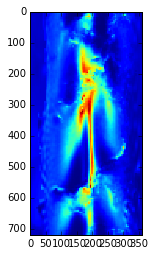

In [51]:
plt.imshow(np.mean(cmap_precip_monthly, axis=2))

## Flood Observatory

In [14]:
# name of preprocessed flood dataframe
df_name = 'df_flood_grace_time_location'

In [15]:
# FO data previously cleaned by FloodObservatory_Preprocess.py
df_flood_grace = pd.read_csv(dir_python_data + df_name + '.csv')
df_flood_grace = df_flood_grace.drop('Unnamed: 0', axis=1)
df_flood_grace.head(1)

,Register #,Began,Date Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity *,Affected sq km,...,Centroid GRACE Lon,Centroid GRACE Lat,Prior CMAP Precip Diff-Days Monthly,Prior CMAP Precip Index Monthly,Prior CMAP Precip Diff-Days Pentad,Prior CMAP Precip Index Pentad,Prior MASCON Diff-Days,Prior MASCON Index,Post MASCON Diff-Days,Post MASCON Index
0,4256.0,11-May-15,11-May-15,21-May-15,11.0,0.0,1776.0,Torrential Rain,1.0,32595.44,...,147.0,256.0,11.0,157.0,1.0,954.0,14.0,144.0,56.0,145.0


# Script Variables

In [16]:
# GRACE
dim = grace_lwe.shape
d1 = dim[0]
d2 = dim[1]
tp = dim[2]

# FO
floods = len(df_flood_grace)

# Merge Features

In [17]:
# merge_grace_feature: Adds a grace (or other) metric as a feature in the flood dataframe
#
# Parameters:
# grace_metric_map: 3D brick with dimensions: [720, 360, time-points]
# df_flood_grace: flood dataframe
# index: dataframe column name specifying prior index to be sued

def merge_grace_feature(grace_metric_map, df_flood_grace, index='Prior MASCON Index'):

    # create empty vector 
    flood_values = np.zeros(df_flood_grace.shape[0])

    # extract grace metric
    for i in range(df_flood_grace.shape[0]):
        lon = int(df_flood_grace['Centroid GRACE Lon'].iloc[i])
        lat = int(df_flood_grace['Centroid GRACE Lat'].iloc[i])
        
        if (pd.notnull(df_flood_grace[index].iloc[i])):
            time_ix = int(df_flood_grace[index].iloc[i])

            if lon == 720:
                lon = 719

            flood_values[i] = grace_metric_map[lon, lat,  time_ix]
        
    # return metric as an array
    return flood_values

## CMAP Features

In [38]:
# Add CMAP Precipitation Features

df_flood_grace['CMAP precip pentad'] = \
    merge_grace_feature(cmap_precip_pentad, df_flood_grace, 'Prior CMAP Precip Index Pentad')
df_flood_grace['CMAP precip pentad norm'] = \
    merge_grace_feature(cmap_precip_pentad_norm, df_flood_grace, 'Prior CMAP Precip Index Pentad')
    
df_flood_grace['CMAP precip monthly'] = \
    merge_grace_feature(cmap_precip_monthly, df_flood_grace, 'Prior CMAP Precip Index Monthly')
df_flood_grace['CMAP precip monthly norm'] = \
    merge_grace_feature(cmap_precip_monthly_norm, df_flood_grace, 'Prior CMAP Precip Index Monthly')

## GRACE Features

In [39]:
# Add GRACE Features

# continuous pre-flood
df_flood_grace['GRACE lwe']=merge_grace_feature(grace_lwe,df_flood_grace)
df_flood_grace['GRACE lwe norm']=merge_grace_feature(grace_lwe_norm,df_flood_grace)
df_flood_grace['GRACE lwe clim']=merge_grace_feature(grace_lwe_clim,df_flood_grace)
df_flood_grace['GRACE lwe clim norm']=merge_grace_feature(grace_lwe_clim_norm,df_flood_grace)
df_flood_grace['GRACE lwe noClim']=merge_grace_feature(grace_lwe_noClim,df_flood_grace)
df_flood_grace['GRACE lwe noClim norm']=merge_grace_feature(grace_lwe_noClim_norm, df_flood_grace)
df_flood_grace['GRACE lwe dt']=merge_grace_feature(grace_lwe_dt,df_flood_grace)
df_flood_grace['GRACE lwe dt norm']=merge_grace_feature(grace_lwe_dt_norm,df_flood_grace)
# continuous post-flood
df_flood_grace['GRACE lwe post']=merge_grace_feature(grace_lwe,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe norm post']=merge_grace_feature(grace_lwe_norm,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe clim norm post']=merge_grace_feature(grace_lwe_clim_norm,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe noClim norm post']=merge_grace_feature(grace_lwe_noClim_norm,df_flood_grace,'Post MASCON Index')

# ranked pre-flood
df_flood_grace['GRACE lwe rank']=merge_grace_feature(grace_lwe_rank,df_flood_grace)
df_flood_grace['GRACE lwe rank norm']=merge_grace_feature(grace_lwe_rank_norm,df_flood_grace)
df_flood_grace['GRACE lwe clim rank']=merge_grace_feature(grace_lwe_clim_rank,df_flood_grace)
df_flood_grace['GRACE lwe clim rank norm']=merge_grace_feature(grace_lwe_clim_rank_norm,df_flood_grace)
df_flood_grace['GRACE lwe noClim rank']=merge_grace_feature(grace_lwe_noClim_rank,df_flood_grace)
df_flood_grace['GRACE lwe noClim rank norm'] = merge_grace_feature(grace_lwe_noClim_rank_norm,df_flood_grace)
# ranked post-flood
df_flood_grace['GRACE lwe rank post']=merge_grace_feature(grace_lwe_rank,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe rank norm post']=merge_grace_feature(grace_lwe_rank_norm,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe clim rank post']=merge_grace_feature(grace_lwe_clim_rank,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe clim rank norm post']=merge_grace_feature(grace_lwe_clim_rank_norm,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe noClim rank post']=merge_grace_feature(grace_lwe_noClim_rank,df_flood_grace,'Post MASCON Index')
df_flood_grace['GRACE lwe noClim rank norm post'] = merge_grace_feature(grace_lwe_noClim_rank_norm,df_flood_grace,'Post MASCON Index')

## MODIS Land Coverage Features

### Individual Land Cover Types

In [40]:
# merge_modis_feature: Adds a modis land coverage boolean feature to the flood dataframe
#
# Parameters:
# modis_mask: modis mask with dimensions: [720, 360]
# df: flood dataframe with prior MASCON index as a feature

def merge_modis_feature(modis_mask, df, index='Prior MASCON Index', tp=152):

    # alter modis mask to match GRACE raw feature bricks
    modis_mask = np.transpose(np.flipud(modis_mask))

    # create 3d modis mask
    modis_mask = modis_mask[:,:,np.newaxis]
    modis_mask_3d = np.tile(modis_mask,(1,1,tp))

    # create empty vector 
    flood_values = np.zeros(df.shape[0])

    # extract modis metric
    for i in range(df.shape[0]):
        lon = int(df['Centroid GRACE Lon'].iloc[i])
        lat = int(df['Centroid GRACE Lat'].iloc[i])

        if (pd.notnull(df[index].iloc[i])):
            time_ix = int(df[index].iloc[i])

            if lon == 720:
                lon = 719

            flood_values[i] = modis_mask_3d[lon, lat, time_ix]
    
    # replace NaN's with zero's
    flood_values[np.isnan(flood_values)] = 0
        
    # return metric as an array
    return flood_values

In [41]:
# add features as columns to dataframe
for key, mask in modis_mask_dict.items():
    df_flood_grace[key]=merge_modis_feature(mask,df_flood_grace)

### All Land Cover Types

In [42]:
# add original modis mask values as feature  to dataframe
df_flood_grace['modis_all']=merge_modis_feature(modis_map_original,df_flood_grace)

# add names to modis_all column
df_flood_grace['modis_all_named'] = df_flood_grace['modis_all'].map({
     0:'Coastal', 1:'Evergreen Needleleaf Forest', 2:'Evergreen Broadleaf Forest',
     3:'Deciduous Needleleaf Forest', 4:'Deciduous Broadleaf Forest',
     5:'Mixed Forest', 6:'Closed Shrublands', 7:'Open Shrublands', 8:'Woody Savannas',
     9:'Savannas', 10:'Grasslands', 11:'Permanent Wetlands', 12:'Croplands',
     13:'Urban and Built-up', 14:'Cropland/Natural Vegetation Mosaic', 15:'Snow and Ice',
     16:'Barren or Sparsely Vegetted', 254:'Unclassified', 255:'Fill Value'
     })

### GRACE Land Cover Types

In [43]:
# intiate by adding original modis mask values as feature to dataframe
df_flood_grace['modis_grace']=merge_modis_feature(modis_map_original,df_flood_grace)

# binarize grace land cover types and non-grace land cover types
df_flood_grace['modis_grace'] = df_flood_grace['modis_all'].map({
     0:'Absorbing Land Cover', 1:'Absorbing Land Cover', 2:'Absorbing Land Cover',
     3:'Absorbing Land Cover', 4:'Absorbing Land Cover',
     5:'Absorbing Land Cover', 6:'Non-Absorbing Land Cover', 7:'Non-Absorbing Land Cover', 
     8:'Non-Absorbing Land Cover', 9:'Non-Absorbing Land Cover', 10:'Absorbing Land Cover', 
     11:'Absorbing Land Cover', 12:'Absorbing Land Cover', 13:'Non-Absorbing Land Cover',
     14:'Absorbing Land Cover', 15:'Non-Absorbing Land Cover', 16:'Non-Absorbing Land Cover', 
     254:'Unclassified', 255:'Fill Value'
     })

# Remove Non-Mainland Floods

In [44]:
# display floods outside land mask
df_flood_grace_ocean = df_flood_grace[pd.isnull(df_flood_grace['GRACE lwe'])]

print 'Floods Outside Land Mask:', df_flood_grace_ocean.shape[0]
display(df_flood_grace_ocean\
[['Country','Centroid GRACE Lon','Centroid GRACE Lat', 'Prior MASCON Index']].head(5))

# remove non-mainland floods from dataframe
df_flood_grace_land = df_flood_grace[~pd.isnull(df_flood_grace['GRACE lwe'])]

print 'Mainland Floods:', df_flood_grace_land.shape[0]

Floods Outside Land Mask: 108


,Country,Centroid GRACE Lon,Centroid GRACE Lat,Prior MASCON Index
14,Dominican Republic,580.0,219.0,141.0
28,Spain,687.0,237.0,138.0
31,Philippines,243.0,209.0,137.0
54,Solomon Islands,321.0,161.0,132.0
63,Saint Vincent,598.0,208.0,130.0


Mainland Floods: 1070


# Create Flood Event Brick

### High Resolution

In [25]:
# create highres flood brick
flood_event_brick = np.zeros(dim)

s_flood_d1 = df_flood_grace_land.loc[:,'Centroid GRACE Lon']
s_flood_d2 = df_flood_grace_land.loc[:,'Centroid GRACE Lat']
s_flood_tp = df_flood_grace_land.loc[:,'Prior MASCON Index']

s_flood_d1.loc[s_flood_d1 == 720] = 719

for i in range(len(df_flood_grace_land)):
    value_d1 = int(s_flood_d1.iloc[i])
    value_d2 = int(s_flood_d2.iloc[i])
    value_tp = int(s_flood_tp.iloc[i])  
    flood_event_brick[value_d1, value_d2, value_tp] = 1;

/Users/aarontrefler_temp2/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/aarontrefler_temp2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Low Resolution

In [26]:
# create low resolution flood brick (0's and 1's)
flood_event_brick_lowres = grace_brick_convert_lowres(flood_event_brick, 6)
flood_event_brick_lowres[flood_event_brick_lowres > 0] = 1

In [27]:
# create binary flood zone map and brick
flood_zone = np.nansum(flood_event_brick_lowres,axis=2)
flood_zone[flood_zone > 0] = 1
flood_zone = flood_zone[:,:,np.newaxis]
flood_zone_brick = np.tile(flood_zone,(1,1,152))

In [28]:
# create label brick (NaNs for non-flood regions)
flood_event_brick_lowres[flood_zone_brick==0] = np.nan

# Save

In [45]:
df_flood_grace_land.to_csv('../Data/df_flood_grace_time_location_features.csv')

In [ ]:
# create dictionary of grace features
grace_features_dict = {
    'grace_lwe':grace_lwe,
    'grace_lwe_norm':grace_lwe_norm,
    'grace_lwe_clim':grace_lwe_clim,
    'grace_lwe_clim_norm':grace_lwe_clim_norm,
    'grace_lwe_noClim':grace_lwe_noClim,
    'grace_lwe_noClim_norm':grace_lwe_noClim_norm,
    'grace_lwe_dt':grace_lwe_dt,
    'grace_lwe_dt_norm':grace_lwe_dt_norm,
    'grace_lwe_rank':grace_lwe_rank,
    'grace_lwe_rank_norm':grace_lwe_rank_norm,
    'grace_lwe_clim_rank':grace_lwe_clim_rank,
    'grace_lwe_clim_rank_norm':grace_lwe_clim_rank_norm,
    'grace_lwe_noClim_rank':grace_lwe_noClim_rank,
    'grace_lwe_noClim_rank_norm':grace_lwe_noClim_rank_norm
}

In [ ]:
# pickle grace features
f = open(dir_python_data + 'grace_features.p', 'wb') 
pickle.dump(grace_features_dict,f, -1)
f.close()

In [ ]:
# pickle flood event brick

# high resolution
f = open(dir_python_data + 'flood_event_brick.p', 'wb') 
pickle.dump([flood_event_brick],
    f, -1)
f.close()

# low resolution
f = open(dir_python_data + 'flood_event_brick_lowres.p', 'wb') 
pickle.dump([flood_event_brick_lowres],
    f, -1)
f.close()

# Create Subsets of Flood Events

### Low Climatology

In [ ]:
df_flood_subset_clim_rank_low = df_flood_grace_land[df_flood_grace_land['GRACE lwe clim rank'] == 1]
df_flood_subset_clim_rank_low.to_csv('../Data/df_flood_subset_clim_rank_low.csv')